# 01 - Exploração inicial dos dados: Kaggle Titanic  

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
mpl.rcParams['figure.figsize'] = (12, 7)

## Carregando os dados

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/original/train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
teste = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/original/test.csv')
teste.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Extraindo informações

### Faixas etárias por pronome de tratamento

Uma forma de resolver os faltantes de idade e agrupar as pessoas por faixas etárias pode ser separar o pronome de tratamento utilizado no nome e relacioná-lo à idade.

In [5]:
titles = []
for nome in titanic['Name']:
  titles.append(nome.split(',')[1].split('.')[0].strip())

titanic['title'] = titles
titanic.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### Andar da Cabine

O número específico da cabine é irrelevante, visto que identifica o usuário e não temos um mapa do navio para identificar a correlação. Portanto retiramos o número e ficamos apenas com a string, alterando, inclusive, o nome da coluna.

In [ ]:
titanic.loc[(titanic.Cabin.notnull()), 'Cabin'] = titanic.loc[(titanic.Cabin.notnull()), 'Cabin'].astype(str).str[0]
titanic.rename(columns={'Cabin': 'Floor'}, inplace=True)

In [52]:
titanic['Floor'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Floor, dtype: int64

## Resolvendo os dados omissos

In [6]:
titanic.shape

(891, 13)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

Existem 177 idades não informadas e 687 cabines não informadas. Como a solução falta dos dados se comporta também nos dados de teste?

In [9]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
86/418

0.20574162679425836

In [12]:
117/891

0.13131313131313133

In [13]:
327/418

0.7822966507177034

In [14]:
687/891

0.7710437710437711

Como é notável acima, a proporção dos valores faltantes é semelhante entre os dados de treino e teste, indicando que a solução para ambos pode ser parecida.

### Age

Vamos começar analisando as idades não informadas: 

**(1) Qual o perfil dos registros sem idade informada?**

In [15]:
sem_idade = titanic.query("Age.isnull().values")
sem_idade

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr


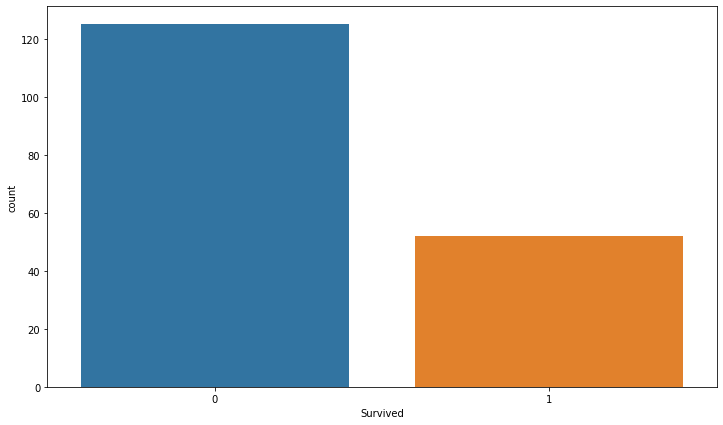

In [35]:
sns.countplot(x='Survived', data=sem_idade);

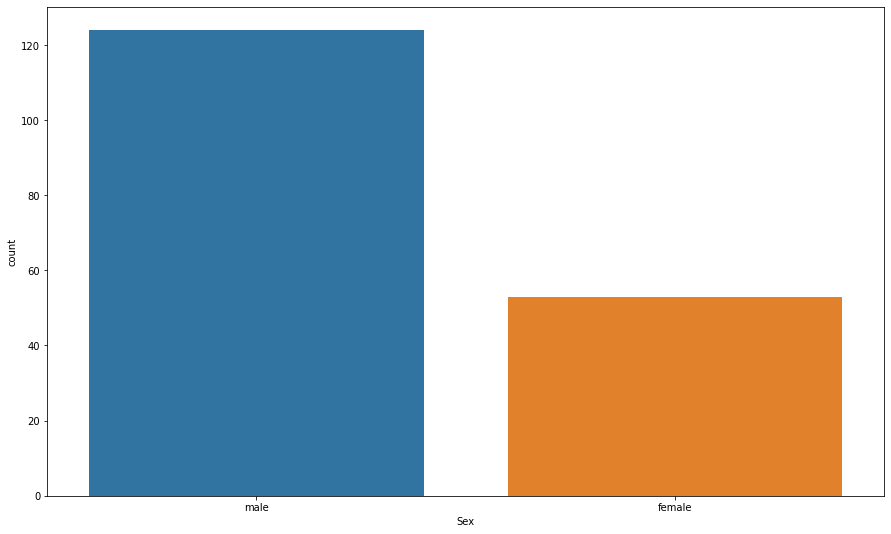

In [17]:
sns.countplot(x='Sex', data=sem_idade);

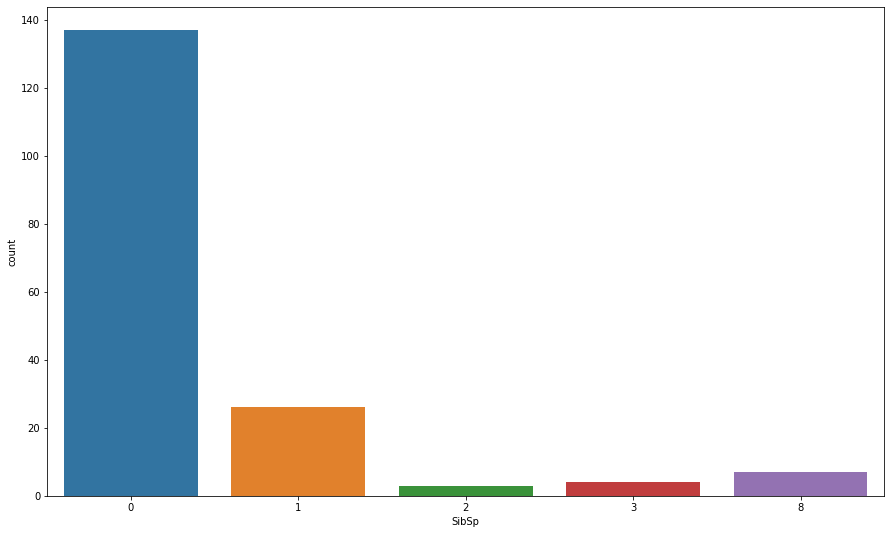

In [18]:
sns.countplot(x='SibSp', data=sem_idade);

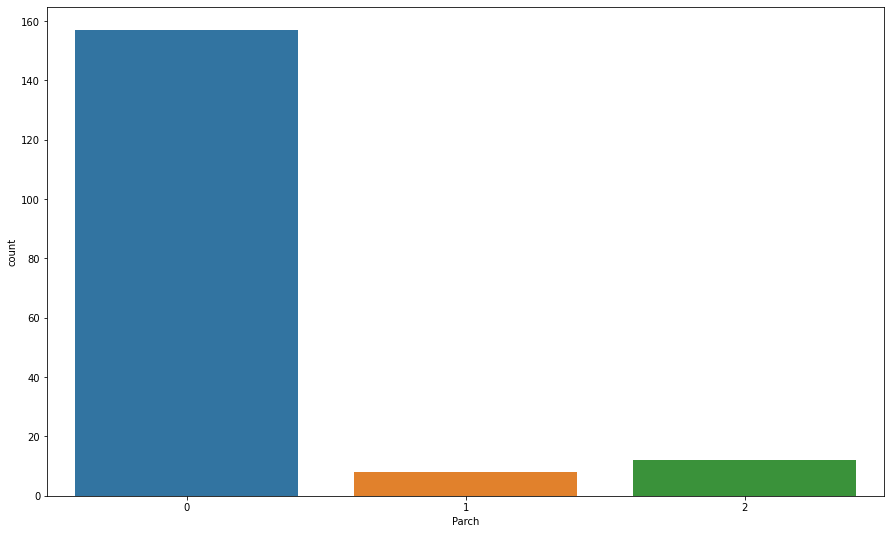

In [19]:
sns.countplot(x='Parch', data=sem_idade);

In [20]:
sem_idade.Cabin.notnull().sum()

19

A maioria dos sem idade estavam sozinhos, eram homens e não sobreviveram. Além disso a maioria também não tinha a cabine informada.

**(2) Como se agrupa a idade pelos pronomes de tratamento?**

In [21]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title'],
      dtype='object')

In [22]:
titanic.groupby(['title', 'Sex']).Age.describe().sort_values(by='std', ascending=False)

,,count,mean,std,min,25%,50%,75%,max
title,Sex,,,,,,,,
Rev,male,6.0,43.166667,13.136463,27.00,31.500,46.5,53.25,57.0
Miss,female,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0
Dr,male,5.0,40.600000,12.876335,23.00,32.000,44.0,50.00,54.0
Mr,male,398.0,32.368090,12.708793,11.00,23.000,30.0,39.00,80.0
Mrs,female,108.0,35.898148,11.433628,14.00,27.750,35.0,44.00,63.0
Major,male,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,male,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Col,male,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Mlle,female,2.0,24.000000,0.000000,24.00,24.000,24.0,24.00,24.0


In [23]:
pessoa_adulta = ['Rev', 'Dr', 'Mr', 'Major', 'Don', 'Jonkheer', 'Sir', 'Mrs', 'Lady', 'Ms', 'the Countess', 'Col', 'Capt']
mulher_solteira = ['Miss', 'Mlle', 'Mme']
menino_crianca = ['Master']

In [24]:
faixa_etaria = []
for title in titanic['title']:
  if (title in menino_crianca):
    faixa_etaria.append('menino_crianca')
  elif (title in mulher_solteira):
    faixa_etaria.append('mulher_solteira')
  else:
    faixa_etaria.append('pessoa_adulta')

titanic['faixa'] = faixa_etaria
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,faixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,pessoa_adulta
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,pessoa_adulta
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,mulher_solteira
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,pessoa_adulta
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,pessoa_adulta


In [25]:
por_faixa = titanic.groupby(['faixa']).Age.describe()
por_faixa

,count,mean,std,min,25%,50%,75%,max
faixa,,,,,,,,
menino_crianca,36.0,4.574167,3.619872,0.42,1.0,3.5,8.0,12.0
mulher_solteira,149.0,21.818792,12.861787,0.75,14.5,21.0,30.0,63.0
pessoa_adulta,529.0,33.628544,12.715473,11.00,24.0,31.0,42.0,80.0


In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'faixa'],
      dtype='object')

In [27]:
sem_idade = titanic.query("Age.isnull().values")
sem_idade.groupby(['faixa']).describe()

PassengerId              ...       Fare          
                      count        mean  ...        75%       max
faixa                                    ...                     
menino_crianca          4.0  278.250000  ...  36.487525   69.5500
mulher_solteira        36.0  396.694444  ...  23.625000  110.8833
pessoa_adulta         137.0  450.394161  ...  24.150000  227.5250

[3 rows x 56 columns]

In [28]:
mediana_menino = por_faixa.query("faixa == 'menino_crianca'")['50%'].values[0]
titanic.loc[(titanic.Age.isnull()) & (titanic.faixa == 'menino_crianca'), 'Age'] = mediana_menino

In [29]:
mediana_msolteira = por_faixa.query("faixa == 'mulher_solteira'")['50%'].values[0]
titanic.loc[(titanic.Age.isnull()) & (titanic.faixa == 'mulher_solteira'), 'Age'] = mediana_msolteira

In [30]:
mediana_adulto = por_faixa.query("faixa == 'pessoa_adulta'")['50%'].values[0]
titanic.loc[(titanic.Age.isnull()) & (titanic.faixa == 'pessoa_adulta'), 'Age'] = mediana_adulto

In [31]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
faixa            0
dtype: int64

In [32]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,faixa
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S,Mr,pessoa_adulta
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S,Mr,pessoa_adulta
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,Mr,pessoa_adulta
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,31.0,1,0,PC 17569,146.5208,B78,C,Mrs,pessoa_adulta
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,Mr,pessoa_adulta
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S,Miss,mulher_solteira
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,Mr,pessoa_adulta
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Mr,pessoa_adulta
36,37,1,3,"Mamee, Mr. Hanna",male,31.0,0,0,2677,7.2292,NaN,C,Mr,pessoa_adulta
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,31.0,0,0,111427,26.5500,NaN,S,Mr,pessoa_adulta


Baseado em todas as análises, dividindo pelas possíveis faixas etárias, foram atribuídas as idades baseada na mediana de cada faixa.

## Removendo colunas irrelevantes

Algumas informações como `PassagenrId`, `Ticked` e `Name` são irrelevantes para o aprendizado pois são únicos para cada passageiro e podem ser removidos da base de aprendizado. O mesmo deve ser feito posteriormente para o tratamento dos dados de teste.

In [33]:
#titanic.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)